## Salary Prediction

### EDA

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings( 'ignore' )
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("CAGEDMOV202207.txt", sep=";")
df.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo
0,202207,2,26,261160,N,8121400,-1,351305,101,7,...,0,0,"2403,79",7,0,1,202207,0,5,"2403,79"
1,202207,4,41,410400,P,8591100,-1,422105,101,7,...,0,0,"1524,60",1,0,1,202207,0,5,"1524,60"
2,202207,2,25,250400,G,4691500,1,784105,101,7,...,0,1,"826,50",7,0,1,202207,0,5,"826,50"
3,202207,4,41,412550,H,4930202,-1,783215,101,5,...,0,0,"1871,40",7,0,1,202207,0,5,"1871,40"
4,202207,3,35,352010,C,2861500,1,724410,101,7,...,0,0,"2524,45",6,0,1,202207,0,1,"11,62"


In [6]:
newdf = df[(df.uf == "35") & (df.município == "355030")]
newdf.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554172 entries, 0 to 3554171
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   competênciamov          int64  
 1   região                  int64  
 2   uf                      int64  
 3   município               int64  
 4   seção                   object 
 5   subclasse               int64  
 6   saldomovimentação       int64  
 7   cbo2002ocupação         int64  
 8   categoria               int64  
 9   graudeinstrução         int64  
 10  idade                   float64
 11  horascontratuais        object 
 12  raçacor                 int64  
 13  sexo                    int64  
 14  tipoempregador          int64  
 15  tipoestabelecimento     int64  
 16  tipomovimentação        int64  
 17  tipodedeficiência       int64  
 18  indtrabintermitente     int64  
 19  indtrabparcial          int64  
 20  salário                 object 
 21  tamestabjan             int64  

In [13]:
df.shape

(3554172, 28)

In [14]:
(df.isna().sum() / len(df)) * 100

competênciamov            0.000000
região                    0.000000
uf                        0.000000
município                 0.000000
seção                     0.000000
subclasse                 0.000000
saldomovimentação         0.000000
cbo2002ocupação           0.000000
categoria                 0.000000
graudeinstrução           0.000000
idade                     0.000197
horascontratuais          0.024788
raçacor                   0.000000
sexo                      0.000000
tipoempregador            0.000000
tipoestabelecimento       0.000000
tipomovimentação          0.000000
tipodedeficiência         0.000000
indtrabintermitente       0.000000
indtrabparcial            0.000000
salário                   0.044399
tamestabjan               0.000000
indicadoraprendiz         0.000000
origemdainformação        0.000000
competênciadec            0.000000
indicadordeforadoprazo    0.000000
unidadesaláriocódigo      0.000000
valorsaláriofixo          0.044399
dtype: float64

No missing values

In [6]:
df.dtypes

ano                                  int64
mes                                  int64
sigla_uf                            object
id_municipio                         int64
id_municipio_6                       int64
cnae_2                               int64
cnae_2_subclasse                     int64
cnae_2_secao                        object
cbo_2002                             int64
saldo_movimentacao                   int64
categoria                            int64
grau_instrucao                       int64
idade                              float64
horas_contratuais                    int64
raca_cor                             int64
sexo                                 int64
tipo_empregador                      int64
tipo_estabelecimento                 int64
tipo_movimentacao                    int64
tipo_deficiencia                     int64
indicador_trabalho_intermitente      int64
indicador_trabalho_parcial           int64
salario_mensal                     float64
tamanho_est

In [15]:
pd.DataFrame({'': df.nunique().index , 'Number of unique values':  df.nunique().values})

,,Number of unique values
0,competênciamov,1
1,região,6
2,uf,28
3,município,5423
4,seção,21
5,subclasse,1315
6,saldomovimentação,2
7,cbo2002ocupação,2477
8,categoria,9
9,graudeinstrução,13


In [9]:
df.salario_mensal.unique()

array([ 1464.        ,  1122.        ,  1070.        , ...,
         739.42999268, 15603.5703125 ,  3972.96      ])

In [10]:
cat = list(df.select_dtypes(include='object').columns)
num  = list(df.select_dtypes(exclude='object').columns)
ordering = num + cat 
df = df[ordering]

In [11]:
def generate_plot(df, row, col):
    plt.figure(figsize=(25,40));
    for i, feat in enumerate(df):
        plt.subplot(row,col, i+1)
        if df[feat].dtypes == 'object':
            sns.countplot(y=df[feat])
            #plt.xticks(rotation=90)
            plt.tight_layout();
        else:
            sns.distplot(x=df[feat], color='c')
            plt.tight_layout();
            plt.xlabel(feat);

ValueError: num must be 1 <= num <= 15, not 16

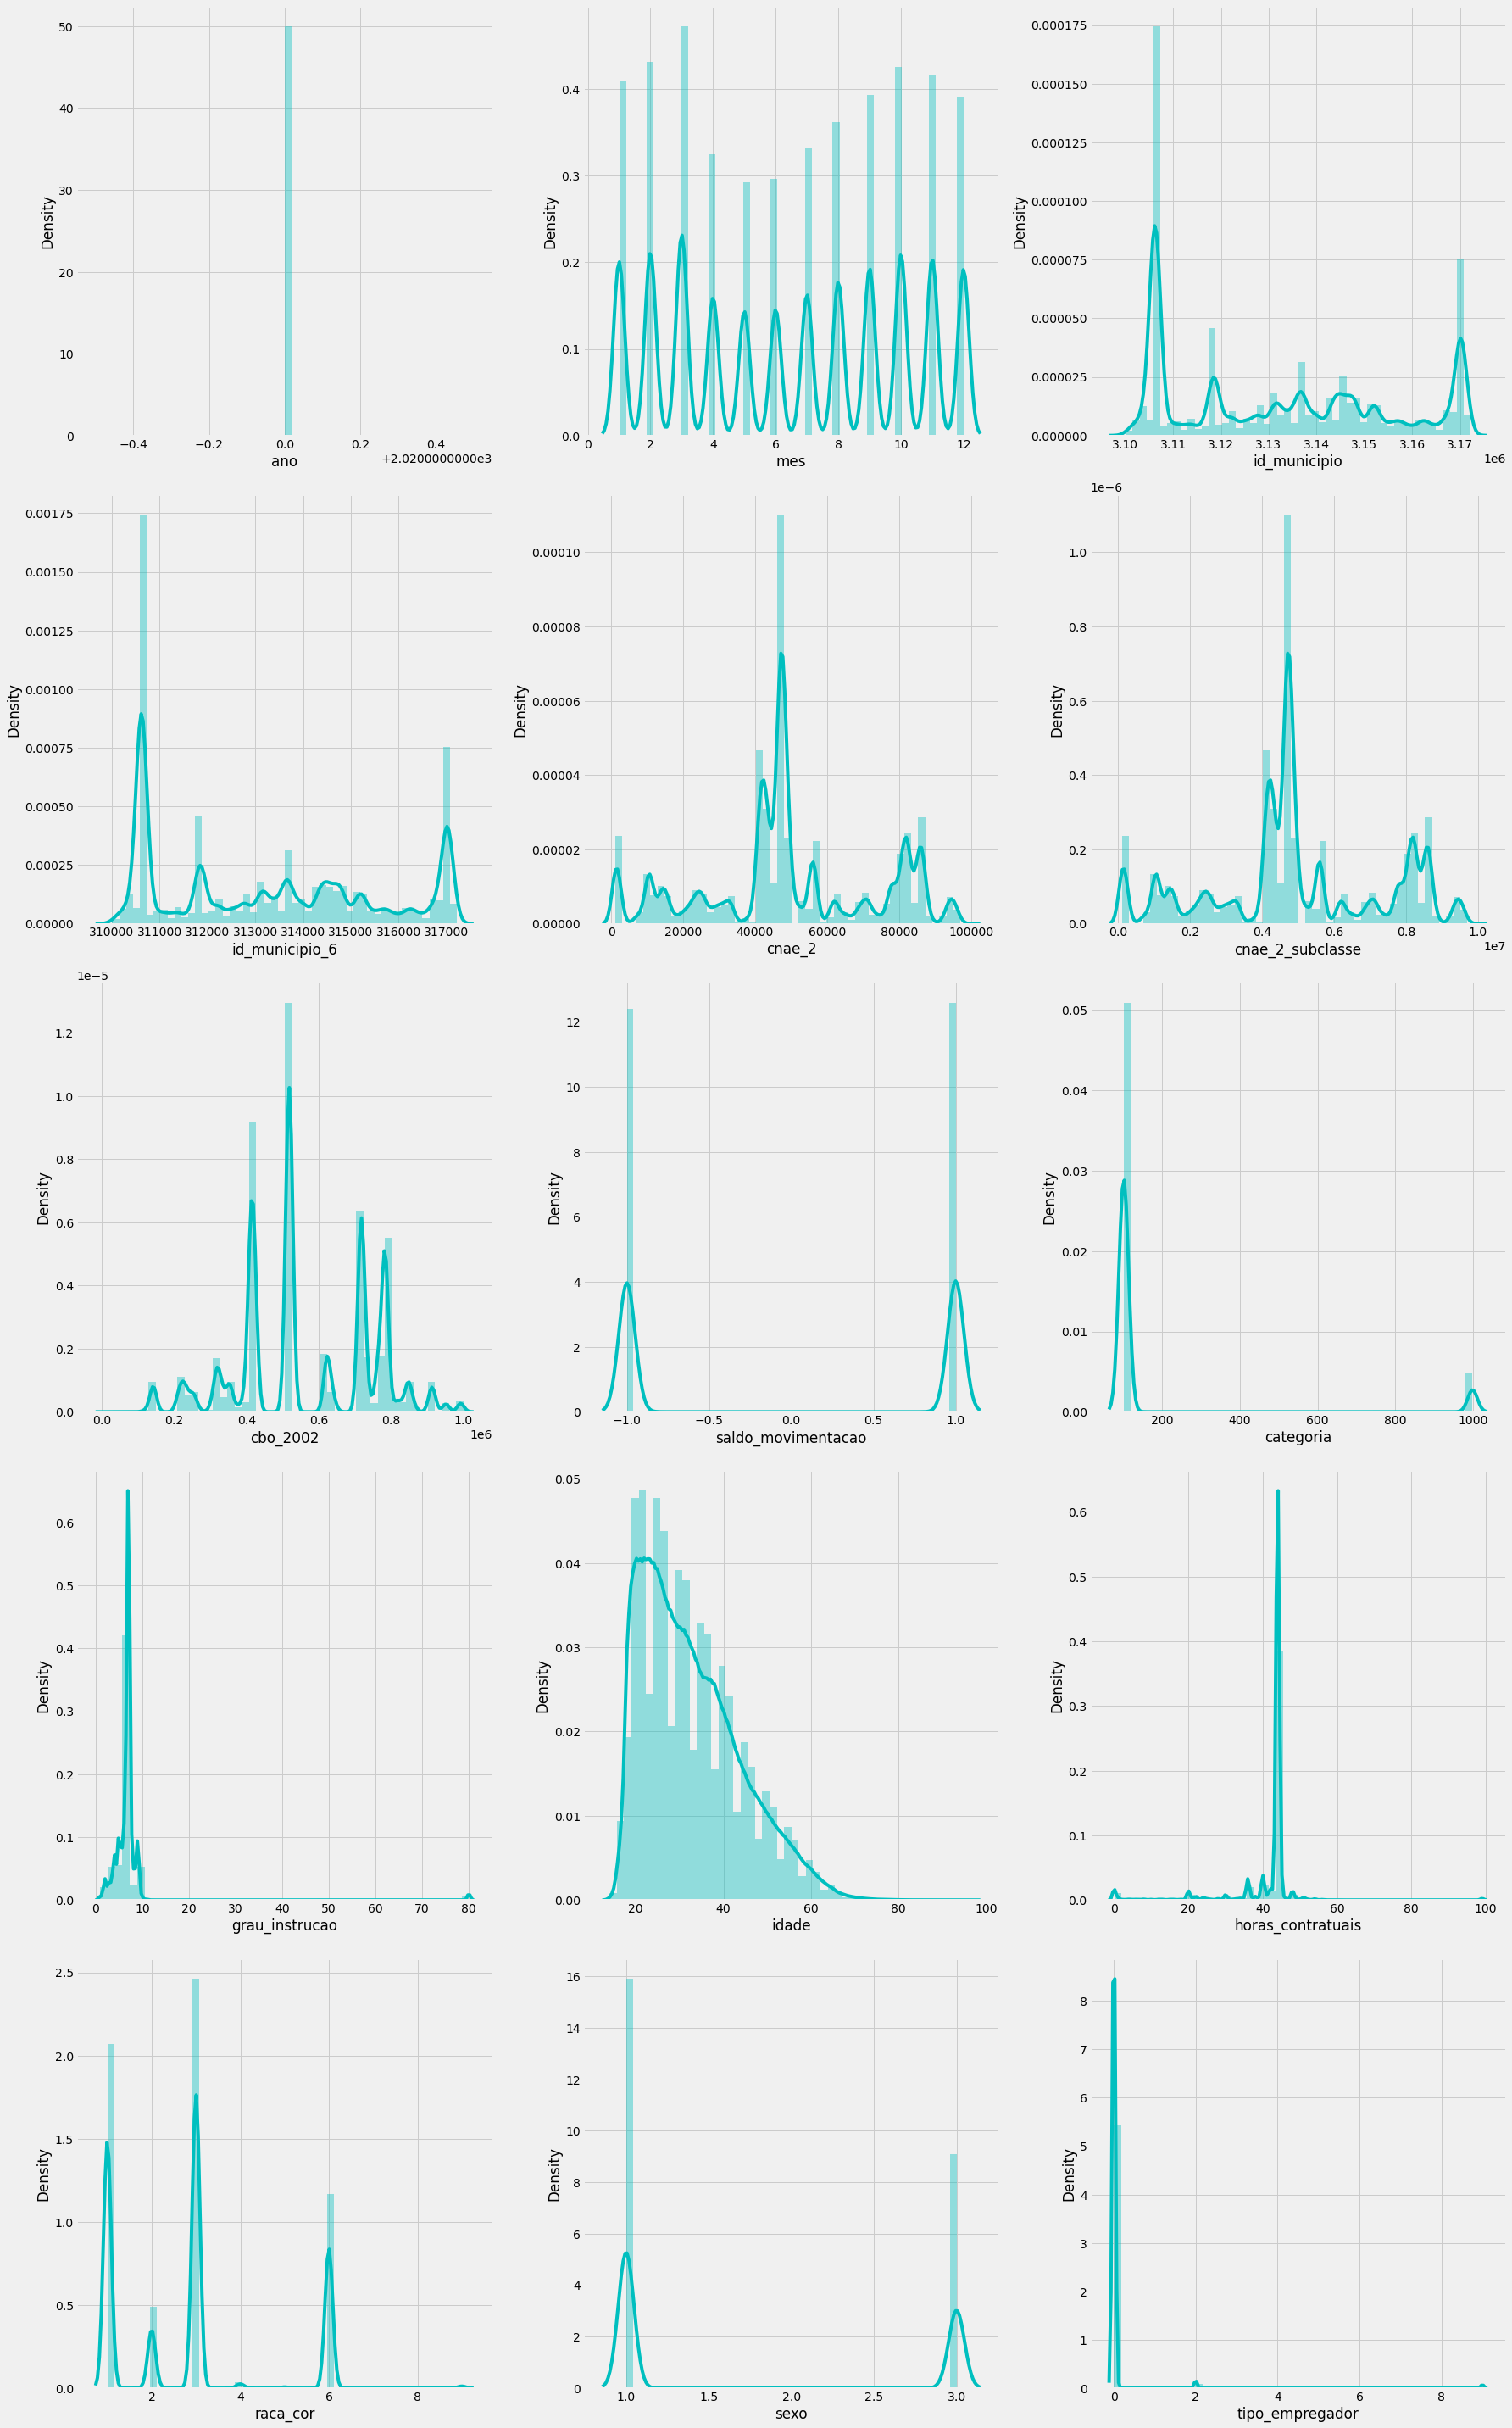

In [12]:
generate_plot(df,5,3)

In [13]:
list(df.select_dtypes(exclude='object').columns)

['ano',
 'mes',
 'id_municipio',
 'id_municipio_6',
 'cnae_2',
 'cnae_2_subclasse',
 'cbo_2002',
 'saldo_movimentacao',
 'categoria',
 'grau_instrucao',
 'idade',
 'horas_contratuais',
 'raca_cor',
 'sexo',
 'tipo_empregador',
 'tipo_estabelecimento',
 'tipo_movimentacao',
 'tipo_deficiencia',
 'indicador_trabalho_intermitente',
 'indicador_trabalho_parcial',
 'salario_mensal',
 'tamanho_estabelecimento_janeiro',
 'indicador_aprendiz',
 'fonte']

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ano,3222538.0,2.020000e+03,0.000000e+00,2020.0,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03
mes,3222538.0,6.491124e+00,3.586718e+00,1.0,3.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
id_municipio,3222538.0,3.132477e+06,2.330079e+04,3100104.0,3.106200e+06,3.131406e+06,3.151404e+06,3.172202e+06
id_municipio_6,3222538.0,3.132474e+05,2.329955e+03,310010.0,3.106200e+05,3.131400e+05,3.151400e+05,3.172200e+05
cnae_2,3222538.0,4.927189e+04,2.386548e+04,1113.0,4.120400e+04,4.722900e+04,6.622300e+04,9.900800e+04
cnae_2_subclasse,3222538.0,4.927198e+06,2.386547e+06,111301.0,4.120400e+06,4.722901e+06,6.622300e+06,9.900800e+06
cbo_2002,3222538.0,5.659620e+05,1.866519e+05,10105.0,4.151150e+05,5.211100e+05,7.223050e+05,9.999990e+05
saldo_movimentacao,3222538.0,7.392310e-03,9.999728e-01,-1.0,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
categoria,3222538.0,1.781619e+02,2.512329e+02,101.0,1.010000e+02,1.010000e+02,1.010000e+02,9.990000e+02
grau_instrucao,3222538.0,7.097387e+00,6.799313e+00,1.0,6.000000e+00,7.000000e+00,7.000000e+00,8.000000e+01


### Data Analysis

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report

In [16]:
# To put percentage numbers above chart ( With hue , Without hue)

def percen (plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def percen_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [6]:
df.salary.value_counts(normalize=True).mul(100).round(0).astype(str) + ' %'

 <=50K    76.0 %
 >50K     24.0 %
Name: salary, dtype: object

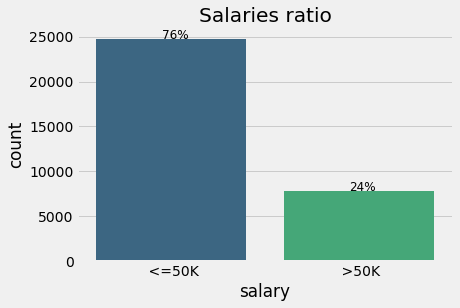

In [17]:
ax = sns.countplot( x=df.salary , data= df , palette='viridis')
ax.set_title('Salaries ratio')
percen(ax , df.salary)

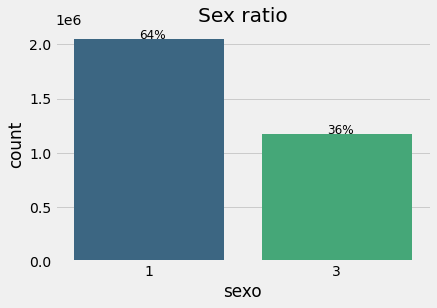

In [18]:
ax = sns.countplot( x=df.sexo , data= df , palette='viridis')
ax.set_title('Sex ratio')
percen(ax , df.sexo)

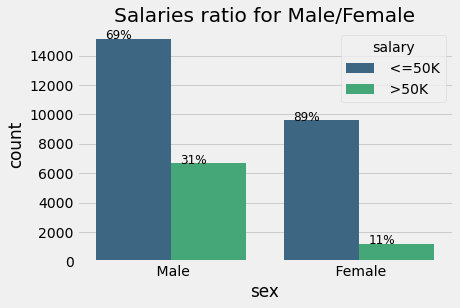

In [19]:
ax = sns.countplot(data=df, x='sex', hue='salary', palette='viridis')
ax.set_title('Salaries ratio for Male/Female')
percen_hue(ax,df.sex , 2,2)

In [20]:
df.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

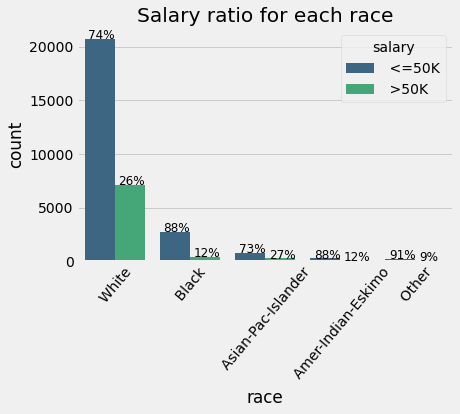

In [9]:
ax = sns.countplot(data=df, x='race', hue='salary', palette='viridis')
ax.set_title('Salary ratio for each race')
plt.xticks(rotation = 50)
percen_hue(ax,df.race , 5,2)

About 74% of White people salary less than 50K and 26% of them salaries above 50K
About 88% of Black people salary less than 50K and 12% of them salaries above 50K
About 73% of Asian-Pac-Islander people salary less than 50K and 27% of them salaries above 50K
About 88% of Amer-Indian-Eskimo people salary less than 50K and 12% of them salaries above 50K
About 91% of Other people salary less than 50K and 9% of them salaries above 50K

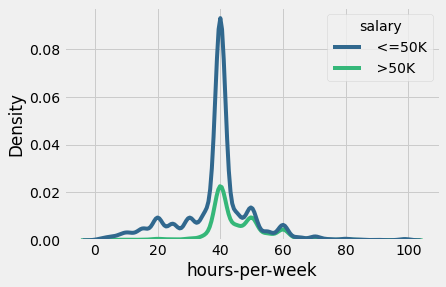

In [22]:
sns.kdeplot(data=df, x='hours-per-week', hue='salary', palette='viridis');

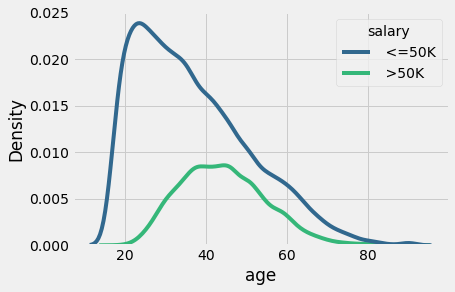

In [23]:
sns.kdeplot(data=df, x='age', hue='salary', palette='viridis');

In [3]:
# Removing spaces from objects data types
df.loc[: , df.dtypes == np.object].apply(lambda e : e.unique())

workclass         [ State-gov,  Self-emp-not-inc,  Private,  Fed...
education         [ Bachelors,  HS-grad,  11th,  Masters,  9th, ...
marital-status    [ Never-married,  Married-civ-spouse,  Divorce...
occupation        [ Adm-clerical,  Exec-managerial,  Handlers-cl...
relationship      [ Not-in-family,  Husband,  Wife,  Own-child, ...
race              [ White,  Black,  Asian-Pac-Islander,  Amer-In...
sex                                                [ Male,  Female]
native-country    [ United-States,  Cuba,  Jamaica,  India,  ?, ...
salary                                              [ <=50K,  >50K]
dtype: object

In [4]:
for col in df.loc[: , df.dtypes == np.object].columns:
    df[col] = df[col].str.strip()

In [5]:
# Formatting the target column
df['salary']= df['salary'].map({'<=50K': 0, '>50K': 1})
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


<AxesSubplot:>

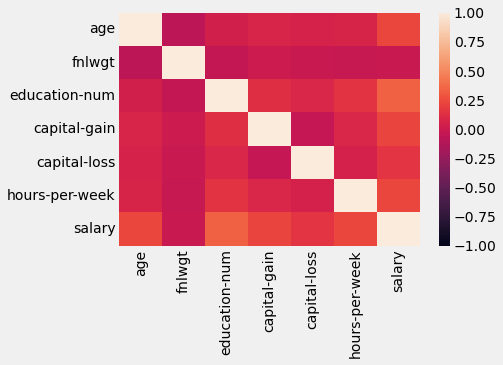

In [18]:
sns.heatmap(data=df.corr(), vmin=-1, vmax=1 )

In [6]:
df.corr().round(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.00,-0.08,0.04,0.08,0.06,0.07,0.23
fnlwgt,-0.08,1.00,-0.04,0.00,-0.01,-0.02,-0.01
education-num,0.04,-0.04,1.00,0.12,0.08,0.15,0.34
capital-gain,0.08,0.00,0.12,1.00,-0.03,0.08,0.22
capital-loss,0.06,-0.01,0.08,-0.03,1.00,0.05,0.15
hours-per-week,0.07,-0.02,0.15,0.08,0.05,1.00,0.23
salary,0.23,-0.01,0.34,0.22,0.15,0.23,1.00


In [17]:
pd.DataFrame({'Native Country': df.groupby('native-country')['salary'].mean().index , 'Mean salary':  df.groupby('native-country')['salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1].head(10)

,Native Country,Mean salary
20,Iran,0.418605
10,France,0.413793
19,India,0.400000
36,Taiwan,0.392157
24,Japan,0.387097
41,Yugoslavia,0.375000
1,Cambodia,0.368421
22,Italy,0.342466
9,England,0.333333
2,Canada,0.322314


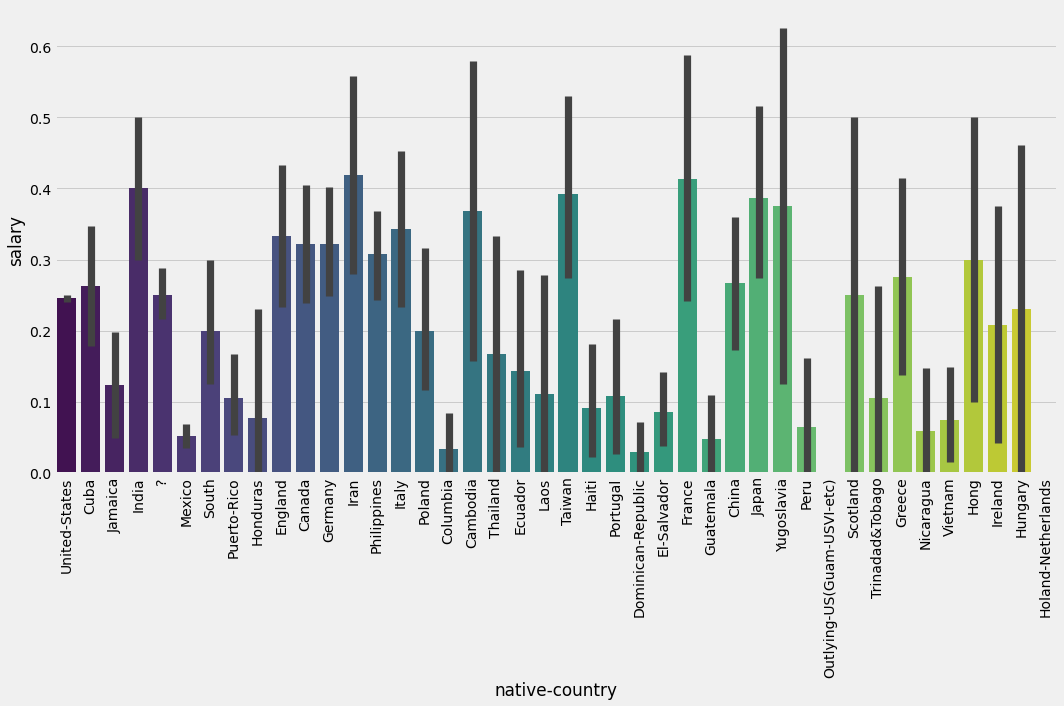

In [8]:
plt.figure(figsize=(16,8))
plt.xticks(rotation = 90)
sns.barplot(data=df, x="native-country", y="salary" , palette='viridis');

In [9]:
pd.DataFrame({'Education Num': df.groupby('education-num')['salary'].mean().index , 'Mean salary':  df.groupby('education-num')['salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]


,Education Num,Mean salary
15,16,0.740920
14,15,0.734375
13,14,0.556587
12,13,0.414753
10,11,0.261216
11,12,0.248360
9,10,0.190235
8,9,0.159509
7,8,0.076212
5,6,0.066452


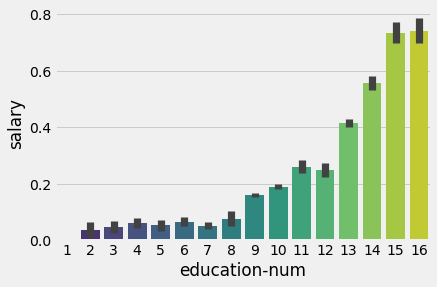

In [10]:
sns.barplot(data=df, x="education-num", y="salary" , palette='viridis');

In [11]:
pd.DataFrame({'Occupattion': df.groupby('occupation')['salary'].mean().index , 'Mean salary':  df.groupby('occupation')['salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Occupattion,Mean salary
4,Exec-managerial,0.484014
10,Prof-specialty,0.449034
11,Protective-serv,0.325116
13,Tech-support,0.304957
12,Sales,0.269315
3,Craft-repair,0.226641
14,Transport-moving,0.200376
1,Adm-clerical,0.134483
7,Machine-op-inspct,0.124875
5,Farming-fishing,0.115694


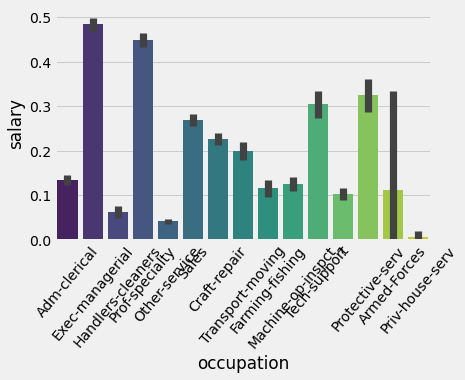

In [12]:
sns.barplot(data=df, x="occupation", y="salary" , palette='viridis');
plt.xticks(rotation = 50)

In [14]:
pd.DataFrame({'Marital Status': df.groupby('marital-status')['salary'].mean().index , 'Mean salary':  df.groupby('marital-status')['salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Marital Status,Mean salary
2,Married-civ-spouse,0.446848
1,Married-AF-spouse,0.434783
0,Divorced,0.104209
6,Widowed,0.085599
3,Married-spouse-absent,0.081340
5,Separated,0.064390
4,Never-married,0.045961


<AxesSubplot:xlabel='marital-status', ylabel='salary'>

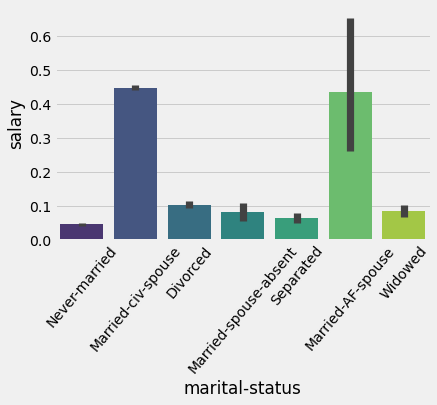

In [16]:
sns.barplot(data=df, x="marital-status", y="salary" , palette='viridis')
plt.xticks(rotation = 50)

In [17]:
pd.DataFrame({'Relationship': df.groupby('relationship')['salary'].mean().index , 'Mean salary':  df.groupby('relationship')['salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Relationship,Mean salary
5,Wife,0.475128
0,Husband,0.448571
1,Not-in-family,0.103070
4,Unmarried,0.063262
2,Other-relative,0.037717
3,Own-child,0.013220


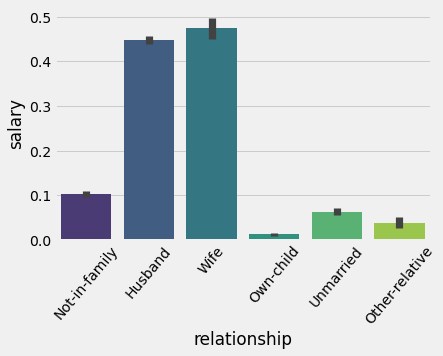

In [20]:
plt.xticks(rotation = 50)
sns.barplot(data=df, x="relationship", y="salary" , palette='viridis');

In [21]:
pd.DataFrame({'Workclass': df.groupby('workclass')['salary'].mean().index , 'Mean salary':  df.groupby('workclass')['salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Workclass,Mean salary
5,Self-emp-inc,0.557348
1,Federal-gov,0.386458
2,Local-gov,0.294792
6,Self-emp-not-inc,0.284927
7,State-gov,0.271957
4,Private,0.218673
0,?,0.104031
8,Without-pay,0.000000
3,Never-worked,0.000000


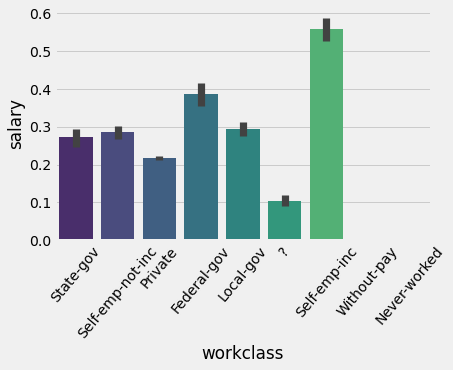

In [27]:
plt.xticks(rotation = 50)
sns.barplot(data=df, x="workclass", y="salary" , palette='viridis');


In [28]:
# Fill NaN values by MODE

df['workclass'].fillna(df['workclass'].value_counts().idxmax() , axis=0 ,inplace=True)
df['occupation'].fillna(df['occupation'].value_counts().idxmax() , axis=0 ,inplace=True)
df['native-country'].fillna(df['native-country'].value_counts().idxmax() , axis=0 ,inplace=True)

In [29]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [30]:
# Formatting [sex] column 

df['sex']= df['sex'].map({'Female': 0, 'Male': 1})
df['sex'].value_counts()

1    21790
0    10771
Name: sex, dtype: int64

In [31]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [32]:
# Formating [ Education ] column

int_list = list(df[df['education'].str.contains('th')]['education'].unique())
int_list.append('Preschool')
df['education'] =  df['education'].replace(int_list , 'Low Education')

df['education'] =  df['education'].replace('HS-grad' , 'Intermediate Education')

hg_list= list(set(df[df['education'].str.contains('-')]['education']))
df['education'] =  df['education'].replace(hg_list , 'Above Intermediate')

In [33]:
df['education'].value_counts()

Intermediate Education    10501
Above Intermediate        10316
Bachelors                  5355
Low Education              4253
Masters                    1723
Doctorate                   413
Name: education, dtype: int64

In [34]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [35]:
# Formating [ marital-status ] column

df['marital-status'] =  df['marital-status'].replace(['Married-civ-spouse' , 'Married-spouse-absent' , 'Married-AF-spouse' ] , 'Married')
df['marital-status'] =  df['marital-status'].replace(['Divorced' , 'Separated' , 'Widowed' ] , 'Other')

In [36]:
df['marital-status'].value_counts()

Married          15417
Never-married    10683
Other             6461
Name: marital-status, dtype: int64

In [37]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,Intermediate Education,9,Other,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,Low Education,7,Married,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [11]:
# Converting categorical features

nums = []
lbl= LabelEncoder()
for col in df.loc[: , df.dtypes == np.object].columns:
    df[col] = lbl.fit_transform(df[col])
    # To know the meaning of numbers
    directory = {index: label for index, label in enumerate(lbl.classes_)}
    nums.append(directory)

In [39]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,1,13,1,1,1,4,1,2174,0,40,39,0
1,50,6,83311,1,13,0,4,0,4,1,0,0,13,39,0
2,38,4,215646,3,9,2,6,1,4,1,0,0,40,39,0
3,53,4,234721,4,7,0,6,0,2,1,0,0,40,39,0
4,28,4,338409,1,13,0,10,5,2,0,0,0,40,5,0


### Modeling

In [12]:
x = df.drop(['fnlwgt' , 'salary' , 'education-num'] , axis=1)
y = df['salary']

In [13]:
std  = MinMaxScaler()
x = pd.DataFrame(std.fit_transform(x) , columns=x.columns)
x

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,0.875,0.600000,0.666667,0.071429,0.2,1.0,1.0,0.021740,0.0,0.397959,0.951220
1,0.452055,0.750,0.600000,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.122449,0.951220
2,0.287671,0.500,0.733333,0.000000,0.428571,0.2,1.0,1.0,0.000000,0.0,0.397959,0.951220
3,0.493151,0.500,0.066667,0.333333,0.428571,0.0,0.5,1.0,0.000000,0.0,0.397959,0.951220
4,0.150685,0.500,0.600000,0.333333,0.714286,1.0,0.5,0.0,0.000000,0.0,0.397959,0.121951
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.500,0.466667,0.333333,0.928571,1.0,1.0,0.0,0.000000,0.0,0.377551,0.951220
32557,0.315068,0.500,0.733333,0.333333,0.500000,0.0,1.0,1.0,0.000000,0.0,0.397959,0.951220
32558,0.561644,0.500,0.733333,1.000000,0.071429,0.8,1.0,0.0,0.000000,0.0,0.397959,0.951220
32559,0.068493,0.500,0.733333,0.666667,0.071429,0.6,1.0,1.0,0.000000,0.0,0.193878,0.951220


In [14]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.8 , random_state=44)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26048, 12)
(6513, 12)
(26048,)
(6513,)


### Random Forest

In [16]:
rfc = RandomForestClassifier()

model = rfc.fit(x_train , y_train)
pred = model.predict(x_test)

print("Accuracy on Test Data : {:,.2f}".format(rfc.score(x_test , y_test) *100 ) , '%')

Accuracy on Test Data : 85.37 %


In [17]:
confusion_matrix(y_test , pred)

array([[4566,  374],
       [ 579,  994]], dtype=int64)

In [18]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4940
           1       0.73      0.63      0.68      1573

    accuracy                           0.85      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



#### Hyperparameter tuning

In [19]:
n_estimators = [int(x) for x in range(200,2000,200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
# rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(x_train, y_train)
# rf_random.best_params_

In [20]:
rfc = RandomForestClassifier(n_estimators=800 , min_samples_split = 10 , min_samples_leaf=4 , max_features='auto' ,max_depth=20 ,bootstrap=False )

model = rfc.fit(x_train , y_train)
pred = model.predict(x_test)

print("Accuracy on Test Data : {:,.2f}".format(rfc.score(x_test , y_test) *100 ) , '%')

Accuracy on Test Data : 86.61 %


In [21]:
confusion_matrix(y_test , pred)

array([[4644,  296],
       [ 576,  997]], dtype=int64)

In [22]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4940
           1       0.77      0.63      0.70      1573

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.80      6513
weighted avg       0.86      0.87      0.86      6513

